# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### <font color=Firebrick>---- 1 Define the problem ----</font>

<font color=blue>**This Jupyter Notebook loads, explores, and visualizes the salary prediction datasets. Also, builds and tests several predictive models, and then makes salary predictions on test data using the best model.**</font>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.utils import shuffle

% matplotlib inline
#Persoal info 
__author__ = "Bhargavsinh Ravalji"

## Part 2 - DISCOVER

### <font color=Firebrick>---- 2 Load the data and Examine the data----</font>

In [2]:
#Load csv file to pd dataframe
def load_data(file):
    return pd.read_csv(file)
train_feature_df = load_data('train_features.csv')
train_target_df = load_data('train_salaries.csv')
test_feature_df = load_data('test_features.csv')

#### <font color=green>*Examine the data*</font>

In [3]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [5]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [6]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_feature_df.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


#### <font color=green>*Merge two dataframes*</font>

In [8]:
#Consolidate training data: Performing inner join and getting uniq rows from both dataframe
def consolidate_data(df1, df2, key=None, left_index=False, right_index=False):
    return pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index) 

In [9]:
raw_train_df = consolidate_data(train_feature_df, train_target_df, key='jobId') 
raw_train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### <font color=Firebrick>---- 3 Clean the data ----</font>

#### <font color=green>*Check for Duplicates*</font>

In [10]:
train_feature_df.duplicated().sum()

0

In [11]:
train_target_df.duplicated().sum()

0

In [12]:
test_feature_df.duplicated().sum()

0

#### <font color=green>*Check for NONE values*</font>

In [13]:
train_feature_df.query('major == "NONE"').major.count()
#--------------OR----------------------
#train_feature_df.loc[train_feature_df.major == 'NONE', 'major'].value_counts()

532355

#### <font color=green>*Check invalid or corrupt data and remove it*</font>

In [14]:
'''remove rows that contain salary <= 0 or duplicate job IDs'''
def clean_data(raw_df):
    clean_df = raw_df.drop_duplicates(subset='jobId')
    clean_df = clean_df[clean_df.salary > 0]
    return clean_df

In [15]:
'''Shuffle, and reindex training data -- shuffling improves cross-validation accuracy'''
clean_train_df = shuffle(clean_data(raw_train_df)).reset_index()
clean_train_df.head(5)

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,924890,JOB1362685332577,COMP2,CFO,NONE,NONE,EDUCATION,15,29,118
1,215186,JOB1362684622873,COMP9,CFO,NONE,NONE,FINANCE,21,27,218
2,838979,JOB1362685246666,COMP31,CFO,DOCTORAL,ENGINEERING,FINANCE,22,52,224
3,931867,JOB1362685339554,COMP37,CTO,DOCTORAL,PHYSICS,SERVICE,9,71,136
4,828506,JOB1362685236193,COMP13,VICE_PRESIDENT,BACHELORS,LITERATURE,WEB,2,34,85


### <font color=Firebrick>---- 4 Explore the data (EDA) ----</font>

In [16]:
'''Divide varables in categorical and numerical'''
categorical_vars = ['jobId','companyId','jobType','degree','major','industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'    

#### <font color=green>*summarize numeric feature variable*</font>

In [17]:
train_feature_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


#### <font color=green>*summarize categorical feature variable*</font>

In [18]:
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684694468,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


#### <font color=green>*summarize target variable*</font>

In [19]:
train_target_df.describe(include = [np.number])

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


#### <font color=green>*Merge categorical and numerical variables data*</font>


In [20]:
def merge_cat_num_data(df1,df2):# cat_vars=None, num_vars=None):
    train_df = pd.merge(df1, df2)
    return train_df 
merged_data = merge_cat_num_data(train_feature_df,train_target_df)
merged_data.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


#### <font color=green>*Find Correction of variables*</font>

In [21]:
def get_correlation(df):
    return df.corr()

#get_correlation(merged_data)
#-------OR-----------
#merged_data.corr()
corr_matrix = get_correlation(merged_data)
corr_matrix["salary"].sort_values(ascending=False)


salary                 1.000000
yearsExperience        0.375013
milesFromMetropolis   -0.297666
Name: salary, dtype: float64

#### <font color=green>*Concat categorical variables and combine result with numerical variables*</font>

### <font color=Firebrick>---- 5 Visualize target variable (Salary) ----</font>

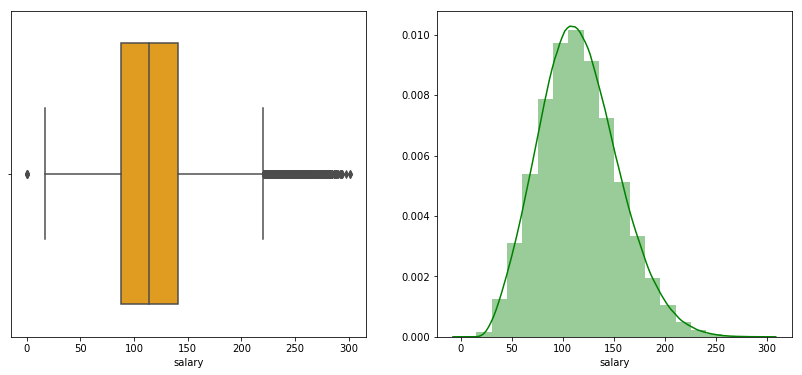

In [34]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(merged_data.salary, color ='Orange')
plt.subplot(1,2,2)
sns.distplot(merged_data.salary, bins=20, color='green')
plt.show()

### <font color=Firebrick>---- 6 Establish a baseline ----</font>

In [ ]:
def concat_cat_num_data(df, cat_vars=None, num_vars=None):
    '''concat all categorical variables and combines result with numerical variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)
feature_df = concat_cat_num_data(clean_train_df, cat_vars=categorical_vars, num_vars=numeric_vars)
test_df = concat_cat_num_data(test_feature_df, cat_vars=categorical_vars, num_vars=numeric_vars)
feature_df.head(5)

In [23]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### <font color=Firebrick>---- 7 Hypothesize solution ----</font>

In [24]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### <font color=Firebrick>---- 8 Engineer features  ----</font>

In [25]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### <font color=Firebrick>---- 9 Create models ----</font>

In [26]:
#create and tune the models that you brainstormed during part 2

### <font color=Firebrick>---- 10 Test models ----</font>

In [27]:
#do 5-fold cross validation on models and measure MSE

### <font color=Firebrick>---- 11 Select best model  ----</font>

In [28]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### <font color=Firebrick>---- 12 Automate pipeline ----</font>

In [29]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### <font color=Firebrick>---- 13 Deploy solution ----</font>

In [30]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### <font color=Firebrick>---- 14 Measure efficacy ----</font>

We'll skip this step since we don't have the outcomes for the test data